In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
delta_cutoff = 0.3

In [34]:
gene_meta = pd.read_csv(
    '/home/hanliu/ref/mouse/gencode/vm22/gencode.vM22.annotation.gene.flat.tsv.gz',
    sep='\t',
    index_col='gene_id')
gene_meta['length'] = gene_meta['end'] - gene_meta['start']
gene_name_to_id = {v: k for k, v in gene_meta['gene_name'].items()}

tf_genes = pd.read_csv(
    '/home/hanliu/ref/TFGene/TFClass/TFClass.with_mouse_gene_id.csv',
    index_col=0)
tf_genes = set(','.join(tf_genes['EnsemblID'].dropna()).split(','))
gene_meta['is_tf'] = gene_meta.index.map(lambda i: i.split('.')[0] in tf_genes)

zfp_pattern = r'Zfp\d+'
p = re.compile(zfp_pattern)
gene_meta.loc[gene_meta['gene_name'].apply(lambda i: p.search(i) is not None), 'is_tf'] = True
tf_gene_names = set(gene_meta[gene_meta['is_tf']]['gene_name'].tolist())

remove_gene_pattern = r'(Gm\d+)|(.+Rik)'
p = re.compile(remove_gene_pattern)

keep_gene = gene_meta[gene_meta['gene_name'].apply(lambda i: p.search(i) is None)].index

In [3]:
dmr_data = pd.read_csv('axis-mch_rms_results_collapsed_passfilter_annotated.csv', index_col=0)
dmr_data.index = dmr_data.index.map(lambda i: f'DGmCH_{i}')
dmr_data.index.name = 'DMR_id'

# filter by delta
mc_rate = dmr_data[['low', 'midlow', 'midhigh', 'high']]
delta = mc_rate.max(axis=1) - mc_rate.min(axis=1)
delta_judge = delta > delta_cutoff

# dmr_data = dmr_data[delta_judge].copy()
# 
# dmr_data.reset_index()[['#chr', 'start', 'end', 'DMR_id'
#                         ]].sort_values(['#chr', 'start'
#                                         ]).to_csv('DG_DMR.mch_group.bed',
#                                                   header=None,
#                                                   index=None,
#                                                   sep='\t')
# dmr_data[dmr_data['trend'] == 'increasing'].reset_index()[['#chr', 'start', 'end', 'DMR_id'
#                         ]].sort_values(['#chr', 'start'
#                                         ]).to_csv('DG_DMR.increase.mch_group.bed',
#                                                   header=None,
#                                                   index=None,
#                                                   sep='\t')
# dmr_data[dmr_data['trend'] == 'decreasing'].reset_index()[['#chr', 'start', 'end', 'DMR_id'
#                         ]].sort_values(['#chr', 'start'
#                                         ]).to_csv('DG_DMR.decrease.mch_group.bed',
#                                                   header=None,
#                                                   index=None,
#                                                   sep='\t')
# dmr_data[dmr_data['trend'] == 'no trend'].reset_index()[['#chr', 'start', 'end', 'DMR_id'
#                         ]].sort_values(['#chr', 'start'
#                                         ]).to_csv('DG_DMR.no_trand.mch_group.bed',
#                                                   header=None,
#                                                   index=None,
#                                                   sep='\t')

In [4]:
direction_judge = dmr_data['trend'].isin(['increasing', 'decreasing'])

dmr_data = dmr_data[delta_judge & direction_judge].copy()
dirction_dms_count = dmr_data.apply(lambda i: i['number_of_dms'] if (i[
    'trend'] == 'increasing') else -(i['number_of_dms']),
                                    axis=1)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
print(dmr_data.shape)
dmr_data.head()

(177172, 41)


,#chr,start,end,number_of_dms,low,midlow,midhigh,high,rho,trend,...,annot-stop_codon.all,annot-TSS.all,annot-TSS.protein_coding,annot-UTR3.all,annot-UTR3.protein_coding,annot-UTR5.all,annot-UTR5.protein_coding,annot-CGI,annot-CGI_shore,annot-Transposon
DMR_id,,,,,,,,,,,,,,,,,,,,,
DGmCH_0,chr1,3026310,3026310,1,0.396226,0.309091,0.631579,0.627907,0.801534,increasing,...,False,False,False,False,False,False,False,False,False,True
DGmCH_2,chr1,3084771,3084771,1,0.413793,0.387097,0.645161,0.766667,0.926190,increasing,...,False,False,False,False,False,False,False,False,False,True
DGmCH_4,chr1,3118806,3118806,1,0.697674,0.933333,0.868421,1.000000,0.837758,increasing,...,False,False,False,False,False,False,False,False,False,True
DGmCH_5,chr1,3132290,3132290,1,0.403226,0.595238,0.750000,0.787234,0.964972,increasing,...,False,False,False,False,False,False,False,False,False,True
DGmCH_6,chr1,3152582,3152582,1,0.071429,0.111111,0.169811,0.377358,0.926309,increasing,...,False,False,False,False,False,False,False,False,False,True


In [6]:
dms_dict = dirction_dms_count.to_dict()

## Gene DMR counts

In [10]:
gene_dmr_overlap = pd.read_csv(
    'gene_increase_dmr_overlap.bed',
    sep='\t',
    header=None,
    names=['chrom', 'start', 'end', 'gene_id', 'inc_dmrs'], na_values='.')
gene_dmr_overlap['length'] = gene_dmr_overlap['end'] - gene_dmr_overlap['start']

In [11]:
gene_dmr_overlap_ = pd.read_csv(
    'gene_decrease_dmr_overlap.bed',
    sep='\t',
    header=None,
    names=['chrom', 'start', 'end', 'gene_id', 'dec_dmrs'], na_values='.')
gene_dmr_overlap['dec_dmrs'] = gene_dmr_overlap_['dec_dmrs']

In [15]:
gene_dmr_overlap.head()

,chrom,start,end,gene_id,inc_dmrs,length,dec_dmrs
0,chr1,3073252,3074321,ENSMUSG00000102693.1,NaN,1069,NaN
1,chr1,3102015,3102124,ENSMUSG00000064842.1,NaN,109,NaN
2,chr1,3205900,3671497,ENSMUSG00000051951.5,"DGmCH_8,DGmCH_22",465597,"DGmCH_9,DGmCH_10,DGmCH_11,DGmCH_12,DGmCH_13,DG..."
3,chr1,3252756,3253235,ENSMUSG00000102851.1,NaN,479,NaN
4,chr1,3365730,3368548,ENSMUSG00000103377.1,NaN,2818,NaN


In [18]:
def get_dms(value):
    if isinstance(value, float):
        return 0
    else:
        return sum([dms_dict.get(dmr_id, 0) for dmr_id in value.split(',')])

gene_dmr_overlap['inc_n_dms'] = gene_dmr_overlap['inc_dmrs'].apply(get_dms)
gene_dmr_overlap['dec_n_dms'] = gene_dmr_overlap['dec_dmrs'].apply(get_dms)


In [20]:
gene_dmr_overlap['consistant_n_dms'] = gene_dmr_overlap['inc_n_dms'] + gene_dmr_overlap['dec_n_dms']

In [22]:
gene_dmr_overlap = gene_dmr_overlap[gene_dmr_overlap['consistant_n_dms'].abs() > 0].copy()

In [23]:
gene_dmr_overlap['n_dms_kb'] = gene_dmr_overlap['consistant_n_dms'] / gene_dmr_overlap['length'] * 1000

In [39]:
dense_gene = gene_dmr_overlap[(gene_dmr_overlap['n_dms_kb'].abs() > 1)
                              (gene_dmr_overlap['length'] > 10000) &
                              (gene_dmr_overlap['consistant_n_dms'].abs() > 20)].copy()

In [41]:
dense_gene['gene_id'].map(gene_meta['gene_name'])

136        Prex2
177         Eya1
271        Paqr8
275        Tram2
300        Rims1
          ...   
53775    Sh3kbp1
53807      Reps2
53864      Gpm6b
53890     Frmpd4
53908       Mid1
Name: gene_id, Length: 1229, dtype: object

## Loop information

In [25]:
dmr_loop_df = pd.read_csv('m3c/axis-mch_dmr_loop.bed', 
                          sep='\t', header=None, 
                          names=['chrom', 'start', 'end', 'dmr_id', 'transcript', 'gene_name'])
dmr_loop_df = dmr_loop_df[~dmr_loop_df['gene_name'].isna()].copy()

## Plot

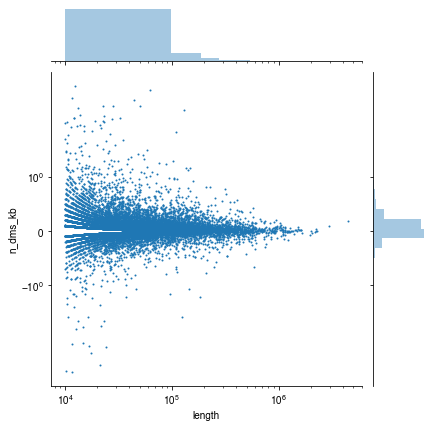

In [26]:
g = sns.jointplot(data=gene_dmr_overlap[(gene_dmr_overlap['n_dms_kb'].abs() < 1000) & 
                                        (gene_dmr_overlap['length'] > 10000)], 
                  x='length', y='n_dms_kb', s=1)
g.ax_joint.set_yscale('symlog')
g.ax_joint.set_xscale('log')


In [ ]:
gene_dmr_overlap[(gene_dmr_overlap['n_dms_kb'].abs() > 1) & 
                 (gene_dmr_overlap['length'] > 10000)]

In [50]:
use_genes = gene_dmr_overlap[gene_dmr_overlap['n_dms_kb'].abs() > 0.3]
use_genes['gene_id'].to_csv('usegenes.csv', header=False)